In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [30]:
image = cv2.imread('sar_1_gray.jpg')

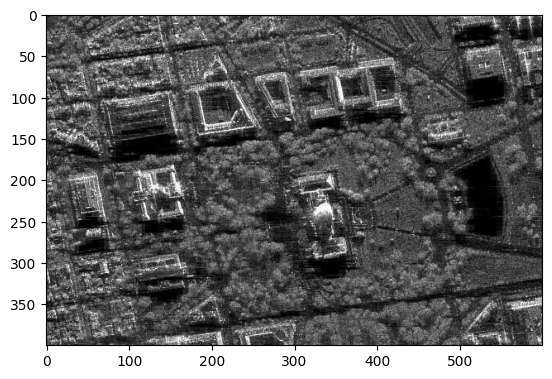

In [31]:
plt.imshow(image)

In [32]:
image.shape # h,w,c

(400, 600, 3)

In [33]:
image[250,250] # b,g,r

array([74, 74, 74], dtype=uint8)

In [34]:
# ROI
img_roi = image[100:200, 500:700]

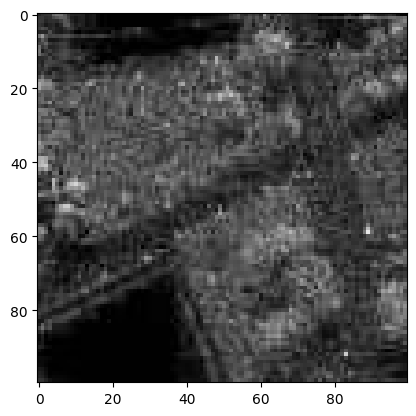

In [35]:
plt.imshow(img_roi)

In [36]:
b,g,r = cv2.split(image)

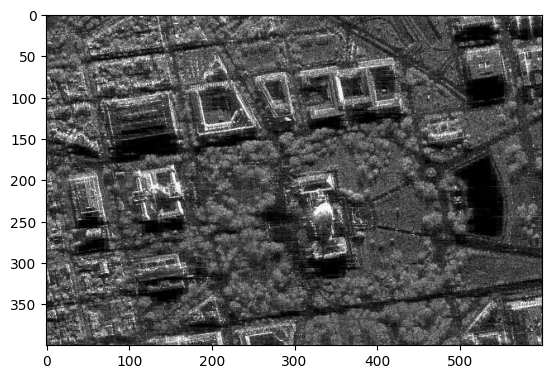

In [37]:
plt.imshow(b, cmap = 'gray')

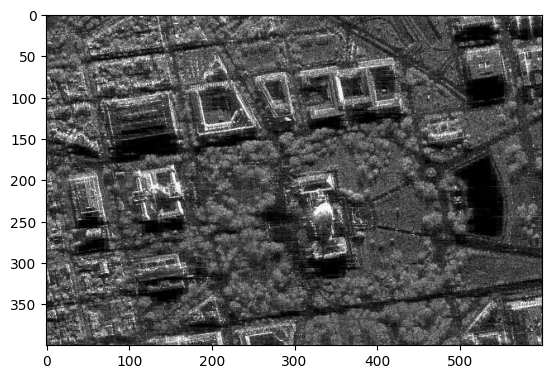

In [38]:
plt.imshow(g, cmap = 'gray')

In [39]:
# alternative approach
b = image[:,:,0]

In [40]:
import copy

image2 = copy.deepcopy(image)

In [41]:
image2[50:100,50:100] = [0,0,0]

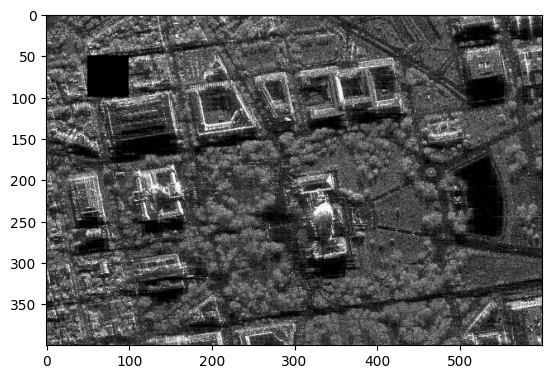

In [42]:
plt.imshow(image2)

In [43]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

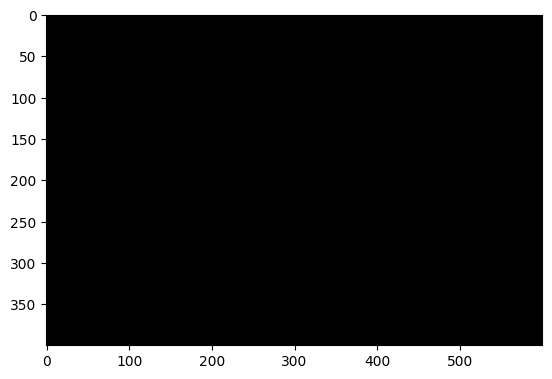

In [44]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [45]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [46]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [47]:
image_gray[0,0]

np.uint8(23)

In [48]:
image_gray.shape

(400, 600)

In [49]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [50]:
image_hsv.shape

(400, 600, 3)

In [51]:
image_hsv[0,0]

array([ 0,  0, 23], dtype=uint8)

In [52]:
image[0,0]

array([23, 23, 23], dtype=uint8)

In [53]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [54]:
image_lab[0,0]

array([ 19, 128, 128], dtype=uint8)

# Пороговая фильтрация

In [55]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

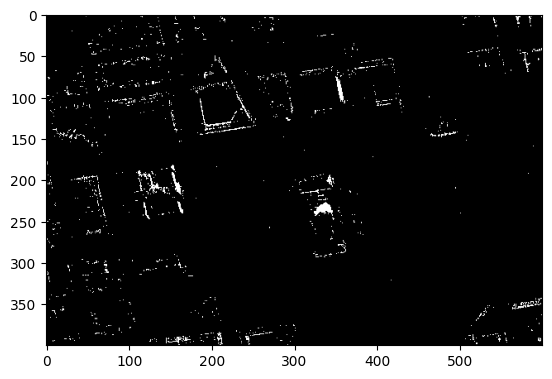

In [56]:
plt.imshow(thresh1, cmap='gray')

In [57]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [58]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

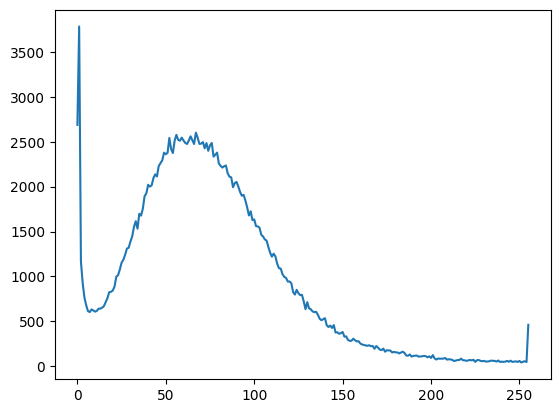

In [59]:
plt.plot(b_hist)

In [60]:
b_hist_cum = b_hist.cumsum()

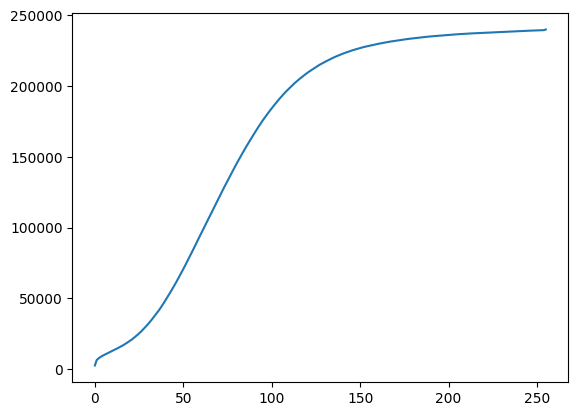

In [61]:
plt.plot(b_hist_cum)

In [62]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

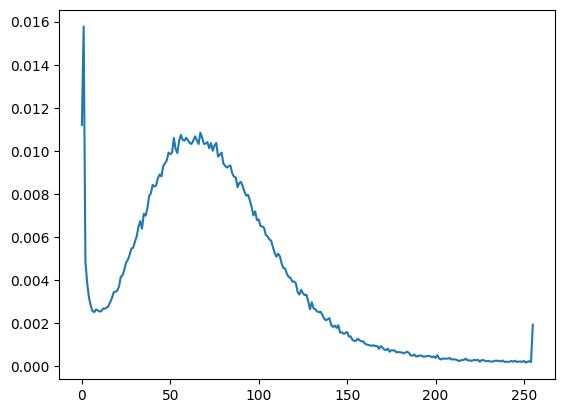

In [63]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [64]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


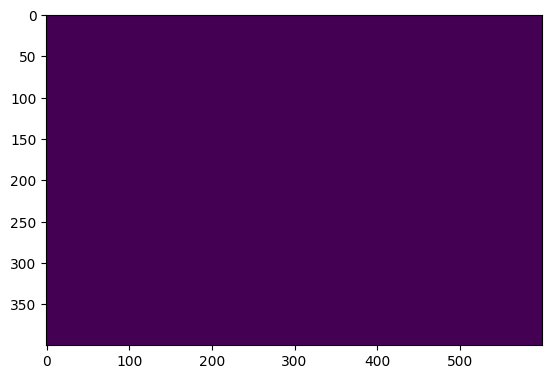

In [65]:
plt.imshow(diff)

In [66]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [67]:
mean = image_gray.mean()

In [68]:
std = image_gray.std()

In [69]:
print(mean,std)

74.94157083333333 43.658465466227916


In [70]:
eq_gray = cv2.equalizeHist(image_gray)

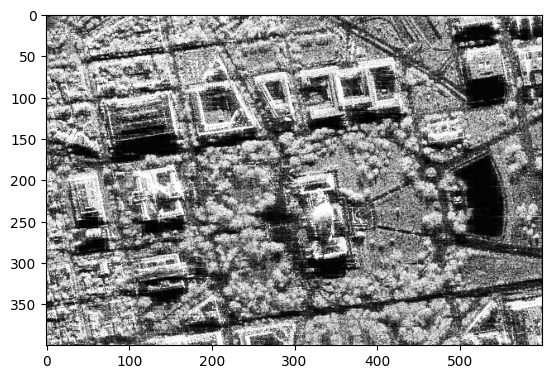

In [71]:
plt.imshow(eq_gray, cmap="gray")


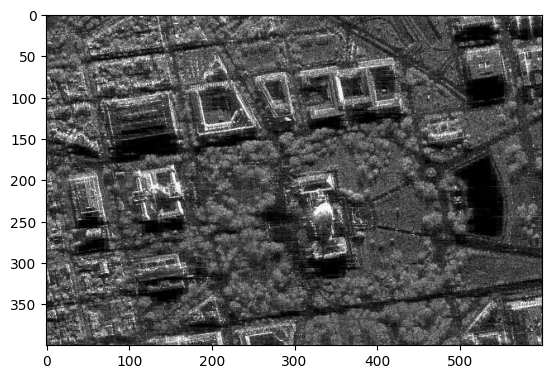

In [72]:
plt.imshow(image_gray, cmap="gray")

In [73]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


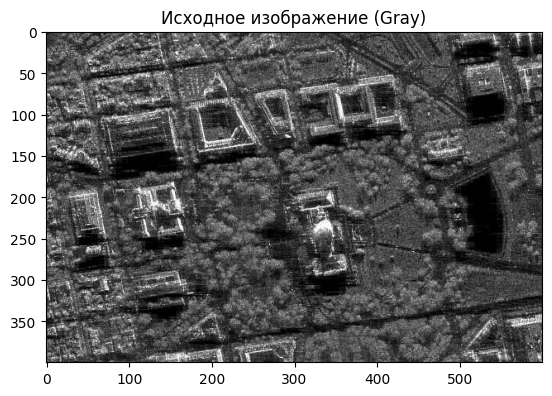

In [74]:
image = cv2.imread("sar_1_gray.jpg",cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap="gray")
plt.title("Исходное изображение (Gray)")
plt.show()

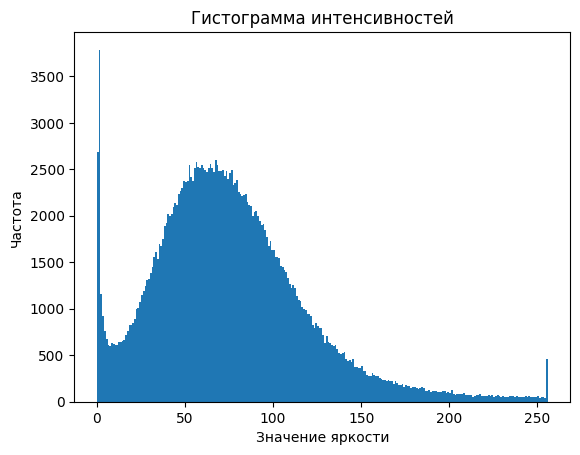

In [75]:
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title("Гистограмма интенсивностей")
plt.xlabel("Значение яркости")
plt.ylabel("Частота")
plt.show()

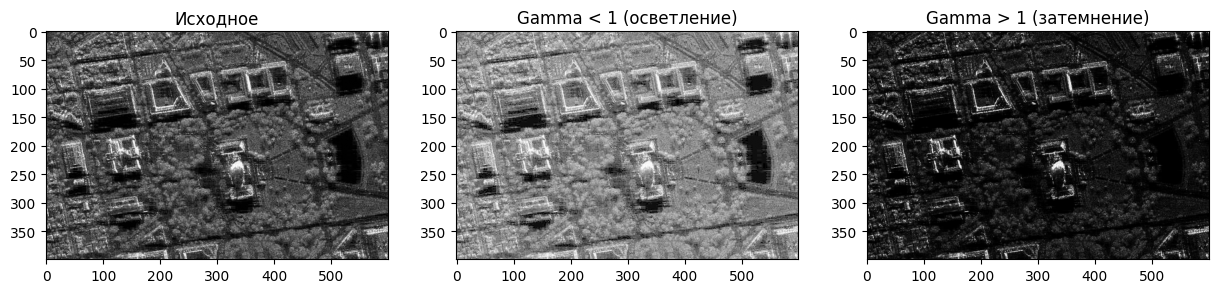

In [76]:
def gamma_correction(img, gamma):
    norm_img = img / 255.0
    corrected = np.power(norm_img, gamma)
    return np.uint8(corrected * 255)

gamma_low = gamma_correction(image, 0.5)
gamma_high = gamma_correction(image, 2.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray"); ax[0].set_title("Исходное")
ax[1].imshow(gamma_low, cmap="gray"); ax[1].set_title("Gamma < 1 (осветление)")
ax[2].imshow(gamma_high, cmap="gray"); ax[2].set_title("Gamma > 1 (затемнение)")
plt.show()

In [77]:
print("MSE (gamma<1):", mean_squared_error(image, gamma_low))
print("MSE (gamma>1):", mean_squared_error(image, gamma_high))

print("SSIM (gamma<1):", structural_similarity(image, gamma_low, channel_axis=None, win_size=3))
print("SSIM (gamma>1):", structural_similarity(image, gamma_high, channel_axis=None, win_size=3))


MSE (gamma<1): 3250.429145833333
MSE (gamma>1): 2383.7636375
SSIM (gamma<1): 0.7733705253862683
SSIM (gamma>1): 0.5004821147426521


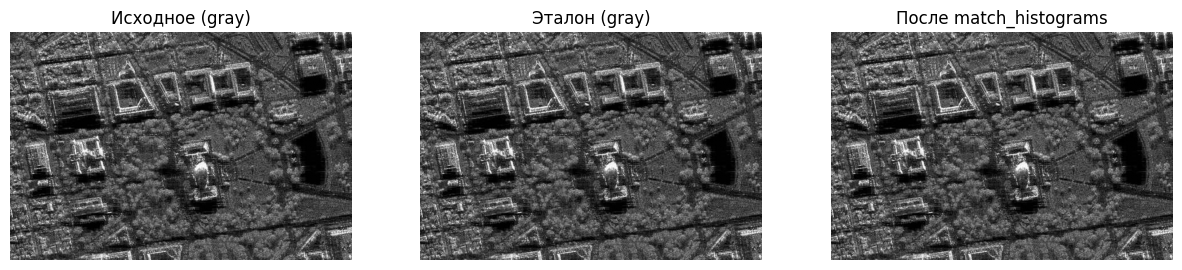

In [83]:
from skimage.exposure import match_histograms

# Загружаем изображения
image = cv2.imread("sar_1_gray.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

eq_gray = cv2.imread("sar_1_gray.jpg", cv2.IMREAD_GRAYSCALE)

# Переводим исходное в grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Match histograms (оба одноканальные)
matched = match_histograms(image_gray, eq_gray)

# Отображаем
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image_gray, cmap="gray"); ax[0].set_title("Исходное (gray)")
ax[1].imshow(eq_gray, cmap="gray"); ax[1].set_title("Эталон (gray)")
ax[2].imshow(matched, cmap="gray"); ax[2].set_title("После match_histograms")
for a in ax: a.axis("off")
plt.show()

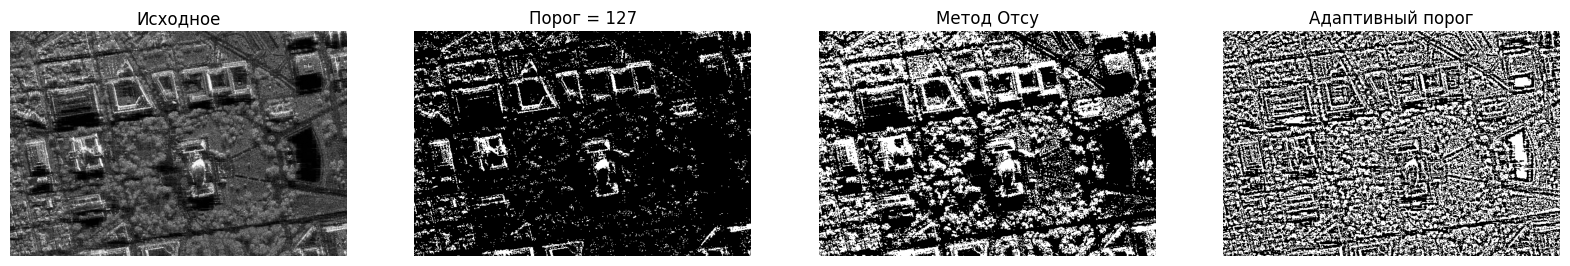

In [79]:
_, th1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)         # фиксированный порог
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # метод Отсу

th3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 11, 2)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap="gray"); ax[0].set_title("Исходное")
ax[1].imshow(th1, cmap="gray"); ax[1].set_title("Порог = 127")
ax[2].imshow(th2, cmap="gray"); ax[2].set_title("Метод Отсу")
ax[3].imshow(th3, cmap="gray"); ax[3].set_title("Адаптивный порог")
for a in ax: a.axis("off")
plt.show()